In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


In [98]:
# import our dataset
data = pd.read_csv("/content/housing.csv")

data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [99]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [100]:
# Separate features (independent variables) and target variable
X = data.drop(columns=["median_house_value"])  # Features
y = data["median_house_value"]  # Target variable

In [101]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [102]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [103]:
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean_proximity')

In [104]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [105]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [106]:
data['ocean_proximity_<1H OCEAN'] = data['ocean_proximity_<1H OCEAN'].astype(int)
data['ocean_proximity_INLAND'] = data['ocean_proximity_INLAND'].astype(int)
data['ocean_proximity_ISLAND'] = data['ocean_proximity_ISLAND'].astype(int)
data['ocean_proximity_NEAR BAY'] = data['ocean_proximity_NEAR BAY'].astype(int)
data['ocean_proximity_NEAR OCEAN'] = data['ocean_proximity_NEAR OCEAN'].astype(int)

In [108]:
X = data.drop(columns=['median_house_value'])
Y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [110]:
Y


0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [111]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [112]:
import numpy as np

y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print("Training RMSE:", train_rmse)
print("Training R-squared:", train_r2)
print("intercept:",model.intercept_)
print("coeffeciets:",model.coef_)

Training RMSE: 68487.30666948423
Training R-squared: 0.6456482397646103
intercept: -2265004.3187162536
coeffeciets: [-2.71087463e+04 -2.56578075e+04  1.08136421e+03 -6.32214552e+00
  1.03004042e+02 -3.64097514e+01  4.31427249e+01  3.92770830e+04
 -3.42694434e+04 -7.35096612e+04  1.79383931e+05 -4.05018603e+04
 -3.11029663e+04]


In [113]:
y_pred = model.predict(X_test)
y_pred

array([201882.95986765, 147279.68214384, 207796.60979846, ...,
       110229.93045317, 137315.73282069, 169083.81714046])

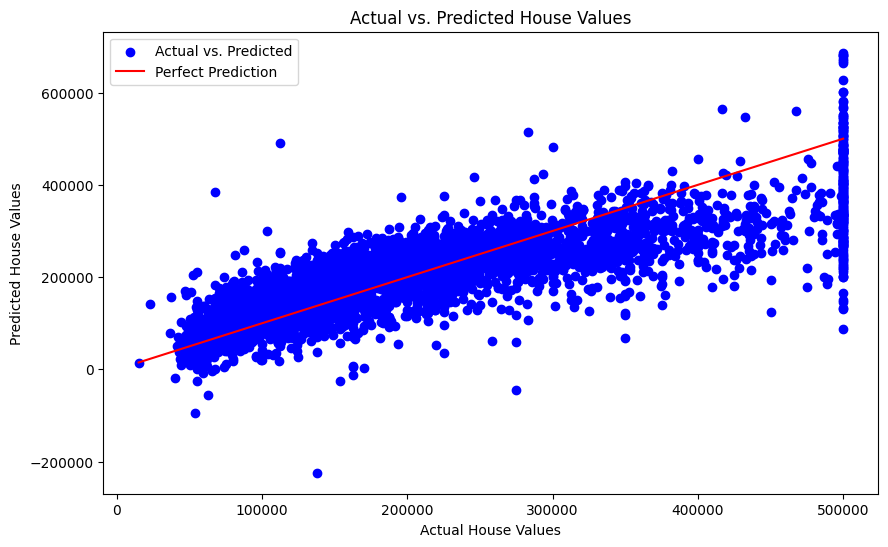

In [ ]:
# Make predictions on the testing set
y_test_pred = model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted House Values')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.legend()
plt.show()

Filtered Training RMSE: 59918.40697763973
Filtered Training R-squared: 0.7076656326842015
Regression Equation:
median_house_value = -2133165.77 + -25324.92*feature1 + -23547.18*feature2 + ...


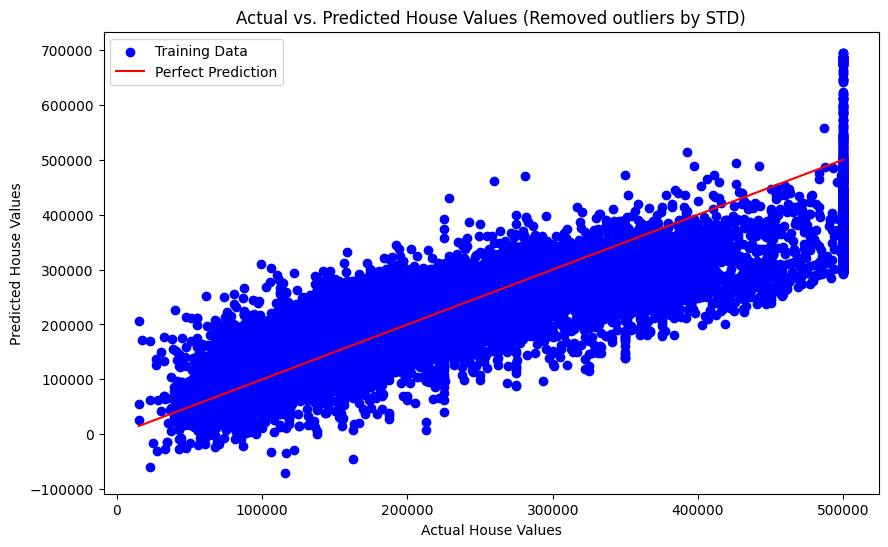

In [124]:
# Drop any rows with missing values
data.dropna(inplace=True)

# Separate features (independent variables) and target variable
X = data.drop(columns=["median_house_value"])  # Features
y = data["median_house_value"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate residuals
residuals = y_train - model.predict(X_train)
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

# Define threshold for outlier removal (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = np.abs(residuals - mean_residual) > threshold * std_residual

# Remove outliers
X_train_filtered = X_train[~outliers]
y_train_filtered = y_train[~outliers]

# Refit model on filtered data
model.fit(X_train_filtered, y_train_filtered)

# Calculate RMSE and R-squared for filtered training data
y_train_pred_filtered = model.predict(X_train_filtered)
train_rmse_filtered = np.sqrt(mean_squared_error(y_train_filtered, y_train_pred_filtered))
train_r2_filtered = r2_score(y_train_filtered, y_train_pred_filtered)

print("Filtered Training RMSE:", train_rmse_filtered)
print("Filtered Training R-squared:", train_r2_filtered)

# Print the equation
coefficients = model.coef_
intercept = model.intercept_
equation = f"median_house_value = {intercept:.2f} + {coefficients[0]:.2f}*feature1 + {coefficients[1]:.2f}*feature2 + ..."
print("Regression Equation:")
print(equation)




# Make predictions on the training set using the filtered model
y_train_pred_filtered = model.predict(X_train_filtered)

# Make predictions on the testing set using the filtered model
y_test_pred_filtered = model.predict(X_test)

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train_filtered, y_train_pred_filtered, color='blue', label='Training Data')
plt.plot([min(y_train_filtered), max(y_train_filtered)], [min(y_train_filtered), max(y_train_filtered)], color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted House Values (Removed outliers by STD)')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.legend()
plt.show()

Filtered Training RMSE: 50532.89767173506
Filtered Training R-squared: 0.7563653497817773


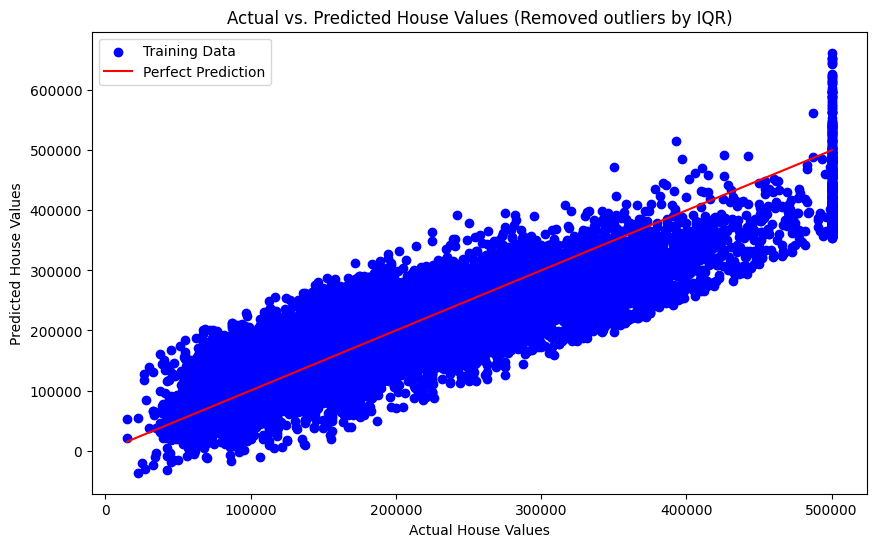

In [125]:
# Function to calculate IQR
def calculate_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate residuals
residuals = y_train - model.predict(X_train)

# Calculate IQR
Q1, Q3, IQR = calculate_iqr(residuals)

# Define threshold for outlier removal
threshold = 1.5

# Identify outliers
outliers = (residuals < Q1 - threshold * IQR) | (residuals > Q3 + threshold * IQR)

# Remove outliers
X_train_filtered = X_train[~outliers]
y_train_filtered = y_train[~outliers]

# Refit model on filtered data
model.fit(X_train_filtered, y_train_filtered)

# Calculate RMSE and R-squared for filtered training data
y_train_pred_filtered = model.predict(X_train_filtered)
train_rmse_filtered = np.sqrt(mean_squared_error(y_train_filtered, y_train_pred_filtered))
train_r2_filtered = r2_score(y_train_filtered, y_train_pred_filtered)
print("Filtered Training RMSE:", train_rmse_filtered)
print("Filtered Training R-squared:", train_r2_filtered)

# Make predictions on the training set using the filtered model
y_train_pred_filtered = model.predict(X_train_filtered)

# Make predictions on the testing set using the filtered model
y_test_pred_filtered = model.predict(X_test)

# Plot actual vs. predicted values for training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train_filtered, y_train_pred_filtered, color='blue', label='Training Data')
plt.plot([min(y_train_filtered), max(y_train_filtered)], [min(y_train_filtered), max(y_train_filtered)], color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted House Values (Removed outliers by IQR)')
plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.legend()
plt.show()


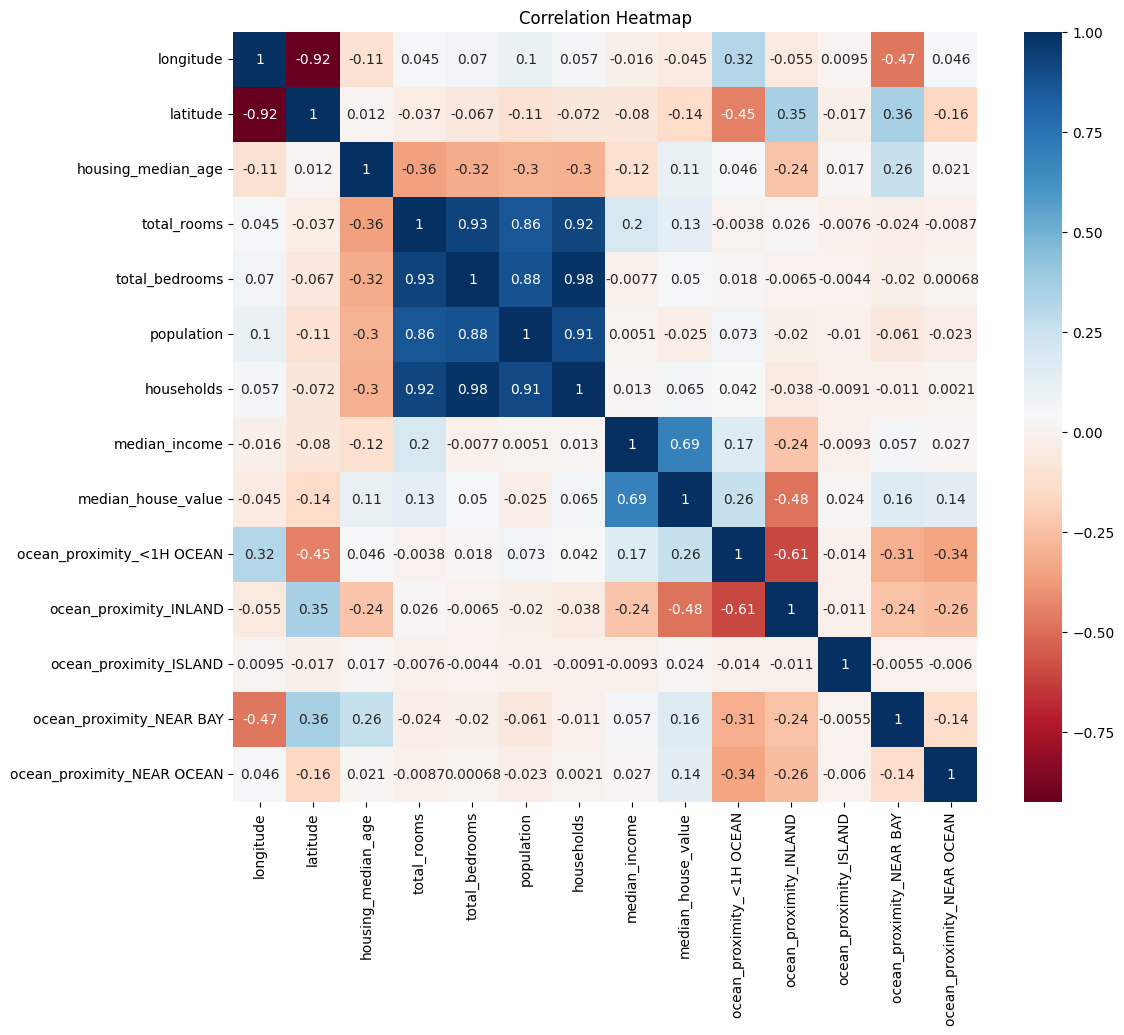

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe) that were chosen for analysis
import seaborn as sns
plt.figure(figsize=(12, 10))  # Adjust the figsize as needed
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.title('Correlation Heatmap')
plt.show()

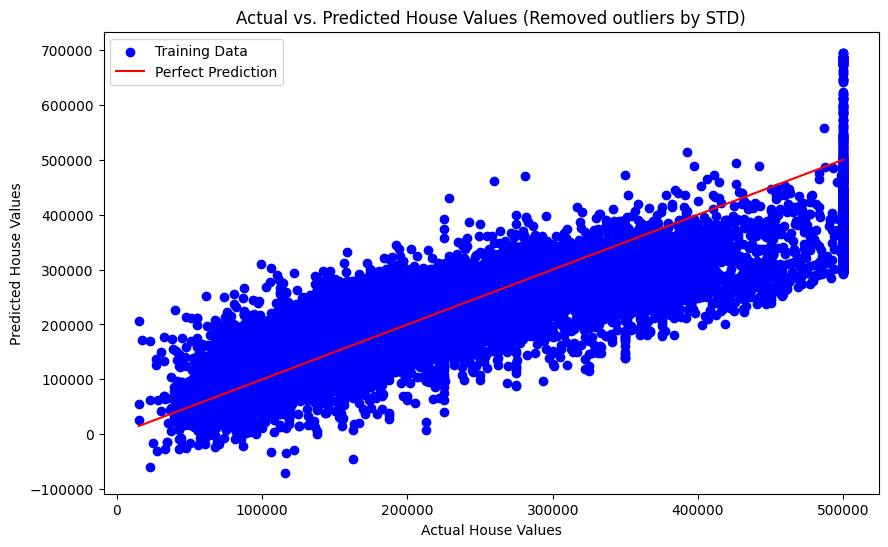

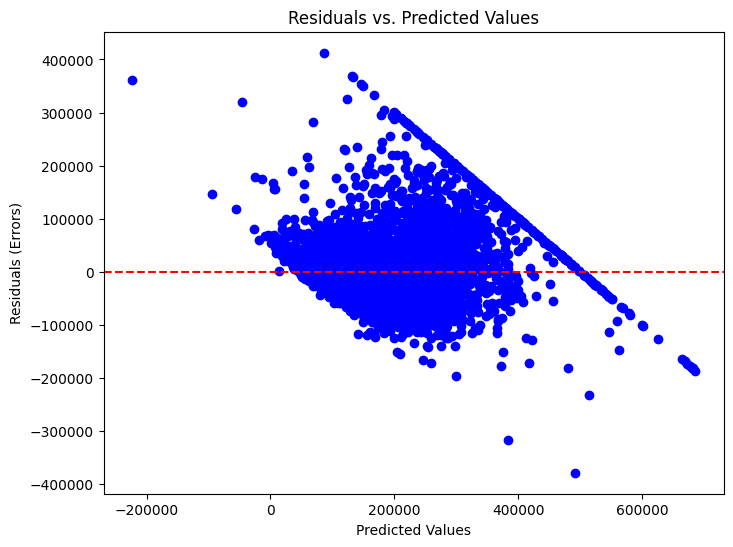

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_test_pred

# Plot error terms
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.show()

In [144]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'data' is your DataFrame containing the mentioned columns

# Rename the columns with spaces
data = data.rename(columns={
    'ocean_proximity_<1H OCEAN': 'ocean_proximity_less_than_1H_OCEAN',
    'ocean_proximity_NEAR BAY': 'ocean_proximity_NEAR_BAY',
    'ocean_proximity_NEAR OCEAN': 'ocean_proximity_NEAR_OCEAN'
})

# Define the formula for the linear regression model
formula = "median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income + ocean_proximity_less_than_1H_OCEAN + ocean_proximity_INLAND + ocean_proximity_ISLAND + ocean_proximity_NEAR_BAY + ocean_proximity_NEAR_OCEAN"

# Fit the linear regression model
model = ols(formula=formula, data=data).fit()

# Print the ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



                                          sum_sq       df             F  \
longitude                           3.259543e+12      1.0    691.492830   
latitude                            3.032270e+12      1.0    643.278290   
housing_median_age                  2.815358e+12      1.0    597.261660   
total_rooms                         2.886290e+11      1.0     61.230935   
total_bedrooms                      1.010329e+12      1.0    214.335336   
population                          5.867936e+12      1.0   1244.848112   
households                          2.090116e+11      1.0     44.340579   
median_income                       6.359377e+13      1.0  13491.043188   
ocean_proximity_less_than_1H_OCEAN  3.107551e+12      1.0    659.248568   
ocean_proximity_INLAND              4.257808e+12      1.0    903.268820   
ocean_proximity_ISLAND              3.159175e+11      1.0     67.020031   
ocean_proximity_NEAR_BAY            2.992775e+12      1.0    634.899625   
ocean_proximity_NEAR_OCEA